### Project Description:
This project will display a habitat suitability model for Sorghastrum nutans, which are a grass native to North America, that has moved northward in the past 5 decades. The changing of grasslands puts both biodiversity and human well-being in danger, as restoration is very difficult especially if access to native species seeds are unavailable. The model will be based on combining multiple data layers related to soil type, topography, and climate with a focus on the Thunder Basin National Grasslands. The result will show areas with ideal conditions for Sorghastrum nutans to survive in.

### Site Description: 
The Thunder Basin National Grassland is located in northeastern Wyoming in the Powder River Basin between the Big Horn Mountains and the Black Hills. The elevation ranges from 3,600 to 5,200 feet, and has a semi-arid climate. The Grassland is a space for recreation such as hiking, sightseeing, hunting, and fishing. There are no developed campgrounds in the area, but camping is allowed. Thunder Basin National Grassland is found along the transition zone, between the Great Plains and the sagebrush steppe. This leaves the area in a gradient zone of temperature, precipitation, and elevation. The Thunder Basin evolved with disturbance from drought, grazing, fire and burrowing mammals.

    Wikimedia Foundation. (2023, February 15). Thunder Basin National Grassland. Wikipedia. https://en.wikipedia.org/wiki/Thunder_Basin_National_Grassland 

### Data Description: 
Soil data: Raster soil layer of sand from 15-30 m deep around the same latitudes and longitudes that were in my study site boundary, and from the 95th percentile. 

    Citation: Chaney, N. W., Minasny, B.,Herman, J. D., Nauman, T. W.,Brungard, C., Morgan, C. L. S., et al.(2019). POLARIS soil properties:30-m probabilistic maps of soilproperties over the contiguousUnited States.Water ResourcesResearch,55, 2916–2938.https://doi.org/10.1029/2018WR022797

Elevation: Elevation raster layer was downloaded from NASA Shuttle Radar Topography Mission (SRTM) datasets, which displays digital elevation model (DEM) of the Earth using radar interferometry. SRTM was launched February 11, 2000 and ﬂew for 11 days, and was collected from ~30 degrees off-nadir to ~58 degrees off-nadir from an altitude of 233 kilometers (km). These swaths are ~225 km wide, and consisted of all land between 60° N and 56° S latitude. This accounts for about 80% of Earth’s total landmass.

    NASA JPL (2013). <i>NASA Shuttle Radar Topography Mission Global 1 arc second</i> [Data set]. NASA EOSDIS Land Processes Distributed Active Archive Center. Accessed 2023-12-11 from https://doi.org/10.5067/MEaSUREs/SRTM/SRTMGL1.003

Climate: The climate data was imported from Northwest Knowledge, with climate forcings in the MACAv2 being drawn from a statistical downscaling of global climate model (GCM) data from the Coupled Model Intercomparison Project 5. 

    Abatzoglou J.T. and Brown T.J. "A comparison of statistical downscaling methods suited for wildfire applications " International Journal of Climatology (2012),doi: 10.1002/joc.2312

In [2]:
# Import all necessary packages to complete assignment 
import os
from glob import glob
import zipfile

import earthpy as et
import earthpy.appeears as eaapp
import earthpy.earthexplorer as etee
import earthpy.spatial as es
import earthpy.plot as ep
import geopandas as gpd
import geoviews as gv
import hvplot.pandas
import hvplot.xarray
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import xrspatial
import requests
import rioxarray as rxr
from rioxarray.merge import merge_arrays

In [1]:
# Download the USFS National Grassland Units 
grass_shp_path = 'https://data.fs.usda.gov/geodata/edw/datasets.php'

# Read the shapefile into a GeoDataFrame
grassland_gdf = gpd.read_file('https://data.fs.usda.gov/geodata/edw/edw_resources/shp/S_USA.NationalGrassland.zip')
grassland_gdf


NameError: name 'gpd' is not defined

In [4]:
# Select study site 
Thunder_gdf = grassland_gdf.set_index('GRASSLANDN').loc[['Thunder Basin National Grassland']]
(Thunder_gdf)

NATIONALGR   GIS_ACRES  SHAPE_AREA  \
GRASSLANDN                                                               
Thunder Basin National Grassland  295513010328  626249.208    0.282888   

                                  SHAPE_LEN  \
GRASSLANDN                                    
Thunder Basin National Grassland   44.08805   

                                                                           geometry  
GRASSLANDN                                                                           
Thunder Basin National Grassland  MULTIPOLYGON (((-105.46005 43.31908, -105.4601...

In [5]:
#Downloading soil variable from the POLARIS dataset (sand)

sand_path_la4344_lo105104 = 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/sand/p95/15_30/lat4344_lon-105-104.tif'
sand_path_la4344_lo105104


'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/sand/p95/15_30/lat4344_lon-105-104.tif'

In [6]:
# Open the soil data as data array
sand_array_la4344_lo105104 = rxr.open_rasterio(sand_path_la4344_lo105104, masked=True).squeeze()
sand_array_la4344_lo105104

<xarray.DataArray (y: 3600, x: 3600)>
[12960000 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -105.0 -105.0 -105.0 ... -104.0 -104.0 -104.0
  * y            (y) float64 44.0 44.0 44.0 44.0 44.0 ... 43.0 43.0 43.0 43.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

### Soil data 1
This plot is displaying sand data in Thunder Basin National Park from latitudes 43-44 degrees and longitude of 104 to 105 degrees. We can see high percentages of sand along a stream which flows east to west in the middle of the image. 

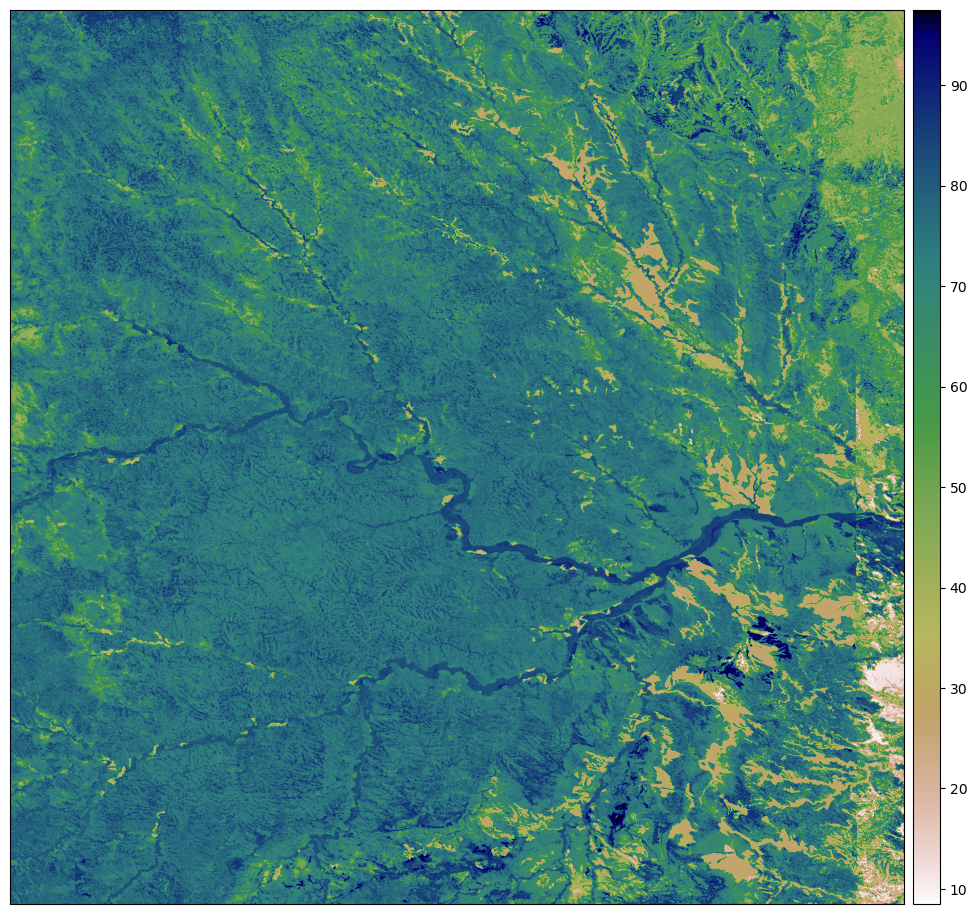

In [7]:
# Plotting the soil data tile 1
ep.plot_bands(sand_array_la4344_lo105104, cmap='gist_earth_r')
plt.show()

### Thunder Basin National Park Boundary
This plot below is displaying the Thunder Basin National Park. 

<Axes: >

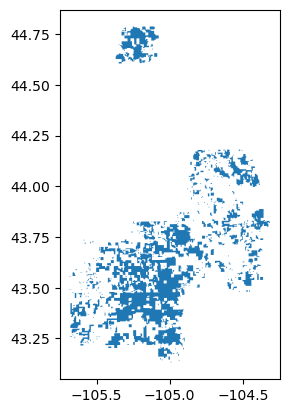

In [8]:
# Plotting Thunder Basin National Park 
Thunder_gdf.plot()

In [9]:
# Finding coordinate systems
print(Thunder_gdf.crs)

print(sand_array_la4344_lo105104.rio.crs)

EPSG:4269
EPSG:4326


In [10]:
# Reprojection the thunder boundary to the soil coordinate system
Thunder_gdf_4326 = Thunder_gdf.to_crs(sand_array_la4344_lo105104.rio.crs)
print('The new crs for Thunder Basin is:', Thunder_gdf_4326.crs)


The new crs for Thunder Basin is: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


### Soil & Study Site Figure 1
This figure is showing both raster and vector data from 43-44 degree latitude and 104-105 degree longitude. We can see both the Thunder Basin National Park and high/low levels of sand in the area.

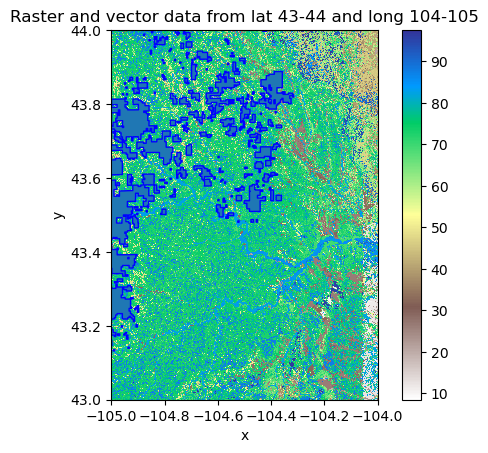

In [11]:
# Plotting raster and vector data together for tile 1
fig, ax = plt.subplots()
sand_array_la4344_lo105104.plot(ax=ax, cmap='terrain_r')
Thunder_gdf_4326.plot(ax=ax, edgecolor='blue', linewidth=1)
ax.set(title='Raster and vector data from lat 43-44 and long 104-105')
plt.show()

In [12]:
# Downloading data for soil tile 2
sand_path_la4344_lo106105 = 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/sand/p95/15_30/lat4344_lon-106-105.tif'
sand_path_la4344_lo106105

'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/sand/p95/15_30/lat4344_lon-106-105.tif'

In [13]:
# Opening data for tile 2
sand_array_la4344_lo106105 = rxr.open_rasterio(sand_path_la4344_lo106105, masked=True).squeeze()
sand_array_la4344_lo106105

<xarray.DataArray (y: 3600, x: 3600)>
[12960000 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -106.0 -106.0 -106.0 ... -105.0 -105.0 -105.0
  * y            (y) float64 44.0 44.0 44.0 44.0 44.0 ... 43.0 43.0 43.0 43.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

### Soil data 2
This plot is displaying sand data in Thunder Basin National Park from latitudes 43-44 degrees and longitude of 105 to 106 degrees. We can see high percentages of sand along a stream which flows east to west in the middle of the image. 

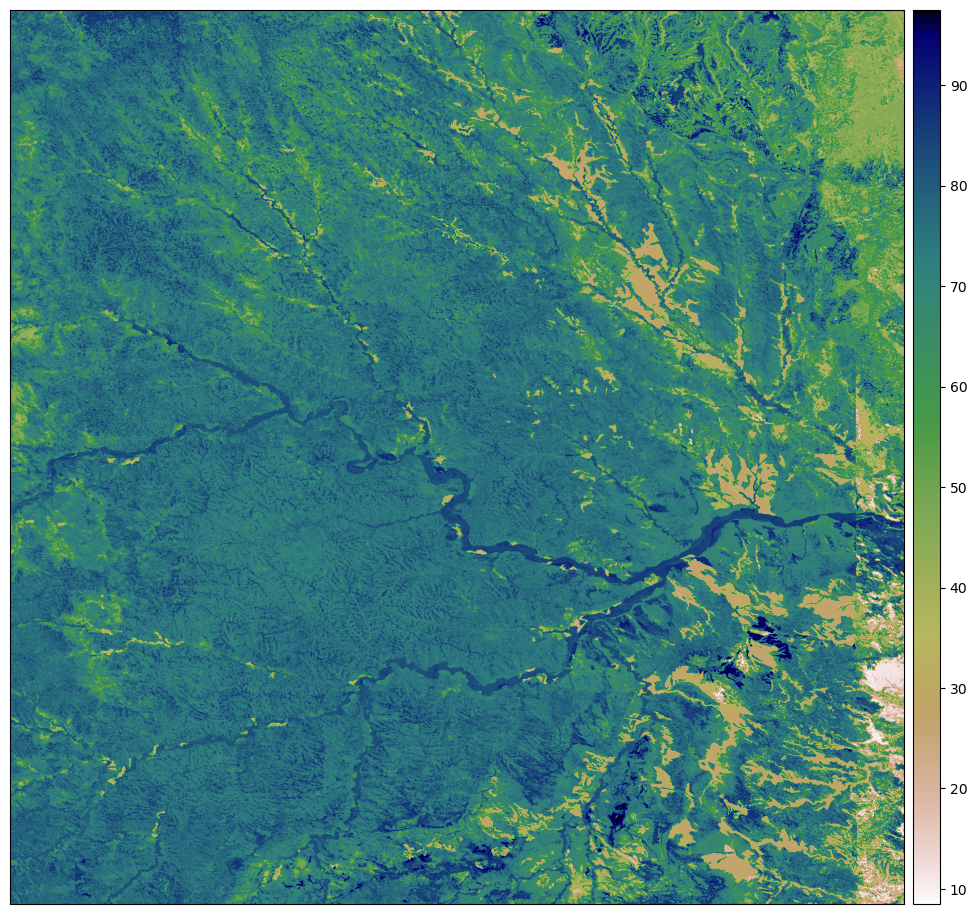

In [14]:
# Opening and plotting the soil data for tile 2
ep.plot_bands(sand_array_la4344_lo105104, cmap='gist_earth_r')
plt.show()

### Soil & Study Site Figure 2
This figure is showing both raster and vector data from 43-44 degree latitude and 105-106 degree longitude. We can see both the Thunder Basin National Park and high/low levels of sand distribution in the area.

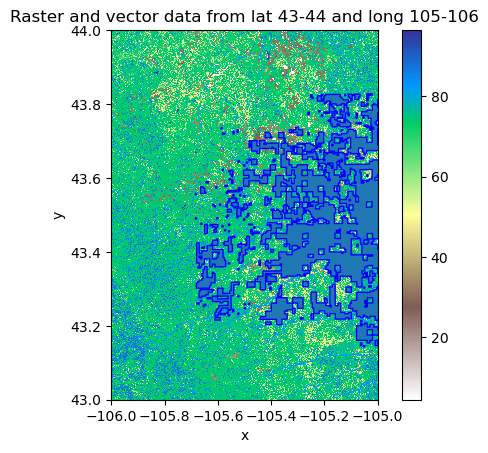

In [15]:
# Plotting raster and vector data together for tile 2
fig, ax = plt.subplots()
sand_array_la4344_lo106105.plot(ax=ax, cmap='terrain_r')
Thunder_gdf_4326.plot(ax=ax, edgecolor='blue', linewidth=1)
ax.set(title='Raster and vector data from lat 43-44 and long 105-106')
plt.show()

In [16]:
# Downloading data for tile 3
sand_path_la4445_lo106105 = 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/sand/p95/15_30/lat4445_lon-106-105.tif'
sand_path_la4445_lo106105

'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/sand/p95/15_30/lat4445_lon-106-105.tif'

In [17]:
# Opening data for tile 3
sand_array_la4445_lo106105 = rxr.open_rasterio(sand_path_la4344_lo106105, masked=True).squeeze()
sand_array_la4445_lo106105

<xarray.DataArray (y: 3600, x: 3600)>
[12960000 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -106.0 -106.0 -106.0 ... -105.0 -105.0 -105.0
  * y            (y) float64 44.0 44.0 44.0 44.0 44.0 ... 43.0 43.0 43.0 43.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

### Soil data 3
This plot is displaying sand data in Thunder Basin National Park from latitudes 44-45 degrees and longitude of 105 to 106 degrees. We can see high percentages of sand in small veins in the bottom left side of the image and very low percentages in the top right areas. 

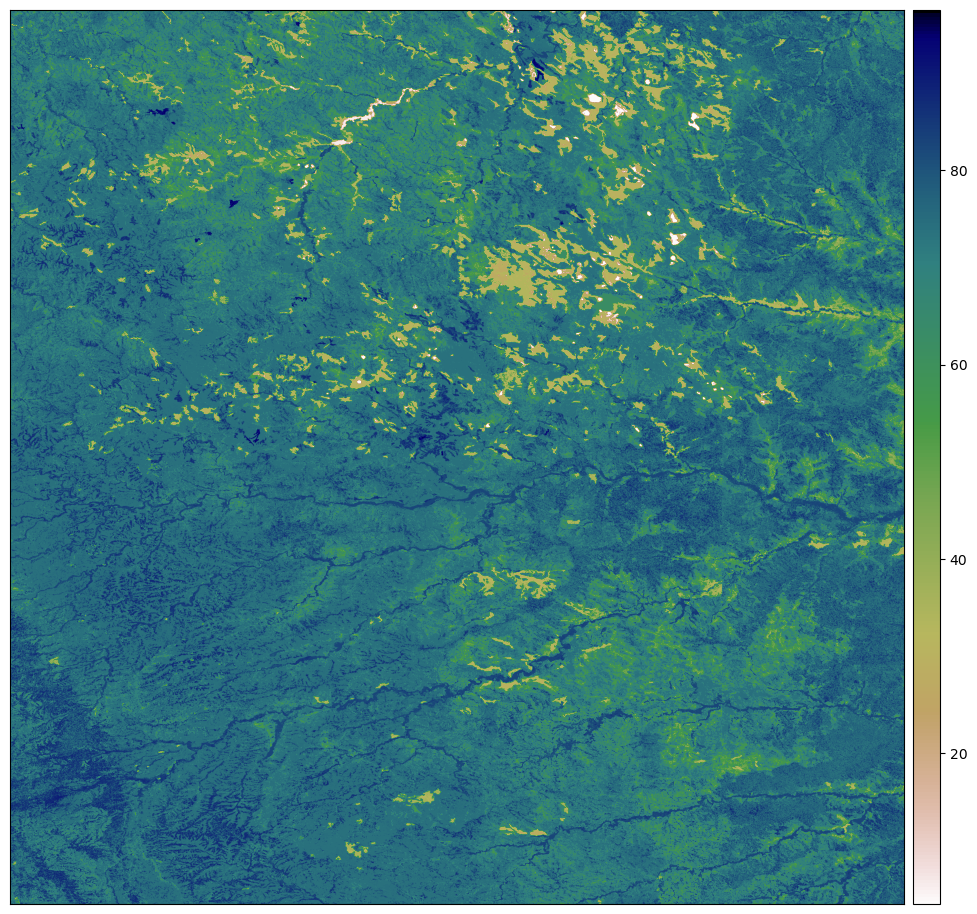

In [18]:
# Opening and plotting the soil data for tile 3
ep.plot_bands(sand_array_la4445_lo106105, cmap='gist_earth_r')
plt.show()

### Soil & Study Site Figure 3
This figure is showing both raster and vector data from 44-45 degree latitude and 105-106 degree longitude. We can see both the Thunder Basin National Park and high/low levels of sand distribution in the area.

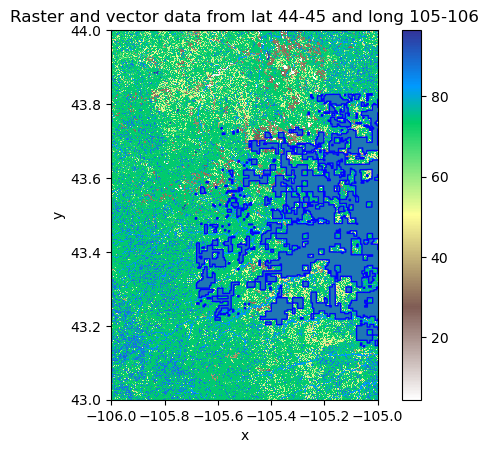

In [19]:
# Plotting raster and vector data together for tile 3 
fig, ax = plt.subplots()
sand_array_la4445_lo106105.plot(ax=ax, cmap='terrain_r')
Thunder_gdf_4326.plot(ax=ax, edgecolor='blue', linewidth=1)
ax.set(title='Raster and vector data from lat 44-45 and long 105-106')
plt.show()

In [20]:
# Merging raster tiles together (tiles 1-3)
from rioxarray.merge import merge_arrays
merged_sand_raster = merge_arrays(
    dataarrays = [sand_array_la4344_lo105104, sand_array_la4344_lo106105, sand_array_la4445_lo106105], crs='EPSG:4326')

merged_sand_raster

<xarray.DataArray (y: 3600, x: 7200)>
array([[73.5, 72.5, 72.5, ..., 43.5, 46.5, 46.5],
       [87.5, 72.5, 72.5, ..., 46.5, 42.5, 58.5],
       [71.5, 71.5, 47.5, ..., 46.5, 46.5, 46.5],
       ...,
       [73.5, 74.5, 74.5, ..., 30.5, 30.5, 30.5],
       [74.5, 73.5, 74.5, ..., 30.5, 30.5, 30.5],
       [74.5, 73.5, 71.5, ..., 30.5, 30.5, 30.5]], dtype=float32)
Coordinates:
  * x            (x) float64 -106.0 -106.0 -106.0 ... -104.0 -104.0 -104.0
  * y            (y) float64 44.0 44.0 44.0 44.0 44.0 ... 43.0 43.0 43.0 43.0
    band         int64 1
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    _FillValue:     nan

In [ ]:
# Pseudo code: would continue the steps from above with tiles of latitude 44-45 and then add them to the arrays 
# that are getting merged together, so the merged_sand_array would show all sand throughout the entire
# Thunder basin grassland, but because of time constraints this was not achievable.

### Merged Diagram of all Three Soil Rasters 
This image is showing all three soil rasters together so we can see a whole picture of soil (sand)percentages throughout the entire Thunder Basin National Park. 

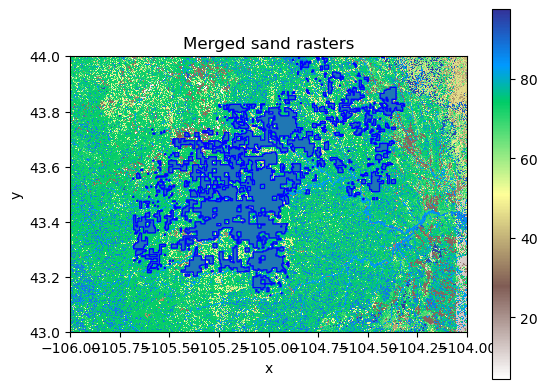

In [21]:
# Plotting merged arrays with the boundary included 
fig, ax = plt.subplots()
merged_sand_raster.plot(ax=ax, cmap='terrain_r')
Thunder_gdf_4326.plot(ax=ax, edgecolor='blue', linewidth=1)
ax.set(title='Merged sand rasters')
plt.show()

In [22]:
# Download elevation data (srtm)
thunder_basin_gdf = (
    grassland_gdf
    .set_index('GRASSLANDN')
    .loc[['Thunder Basin National Grassland']]
)
download_key='Thunder-Basin-SRTM'
srtm_downloader = eaapp.AppeearsDownloader(
    download_key=download_key,
    product='SRTMGL1_NC.003',
    layer='SRTMGL1_DEM',
    start_date='02-11-2000',
    end_date='02-21-2000',
    polygon=thunder_basin_gdf)
srtm_downloader.download_files()

In [23]:
# Opening srtm data as data array
srtm_path = glob(
    os.path.join(
        srtm_downloader.data_dir, 
        'SRTMGL1_NC.003*',
        '*.tif')
)
# Reprojecting srtm data
srtm_opened_data = (
    rxrmerge.merge_arrays(
        [rxr.open_rasterio(srtm_path, masked=True).squeeze() 
        for srtm_path 
        in srtm_path][0])
    .rio.reproject_match(merged_sand_arrays)
)

In [24]:
doy_start = -19
doy_end = -12
scale_factor = 1

srtm_da_list = []
for srtm_path in srtm_path:
    # Get date from file name
    doy = srtm_path[doy_start:doy_end]
    date = pd.to_datetime(doy, format='%Y%j')

    # Open dataset
    da = rxr.open_rasterio(srtm_path, masked=True).squeeze()

    # Prepare to concatenate: Add date dimension and clean up metadata
    da = da.assign_coords({'date': date})
    da = da.expand_dims({'date': 1})
    da.name = 'SRTM'

    # Divide by scale factor
    da = da / scale_factor

    # Add the DataArray to the end of the accumulator list
    srtm_da_list.append(da)

srtm_da_list

[<xarray.DataArray 'SRTM' (date: 1, y: 5961, x: 4935)>
 array([[[1254., 1256., 1258., ..., 1163., 1159., 1156.],
         [1253., 1255., 1257., ..., 1162., 1159., 1159.],
         [1253., 1254., 1256., ..., 1162., 1161., 1163.],
         ...,
         [1658., 1656., 1658., ..., 1391., 1392., 1392.],
         [1653., 1653., 1654., ..., 1389., 1390., 1390.],
         [1651., 1651., 1651., ..., 1384., 1384., 1382.]]], dtype=float32)
 Coordinates:
     band         int64 1
   * x            (x) float64 -105.7 -105.7 -105.7 ... -104.3 -104.3 -104.3
   * y            (y) float64 44.79 44.79 44.79 44.79 ... 43.13 43.13 43.13 43.13
     spatial_ref  int64 0
   * date         (date) datetime64[ns] 2000-02-11]

### SRTM elevation diagram
The diagram below displays the varying elevations throughout the Thunder Basin National Grasslands. 

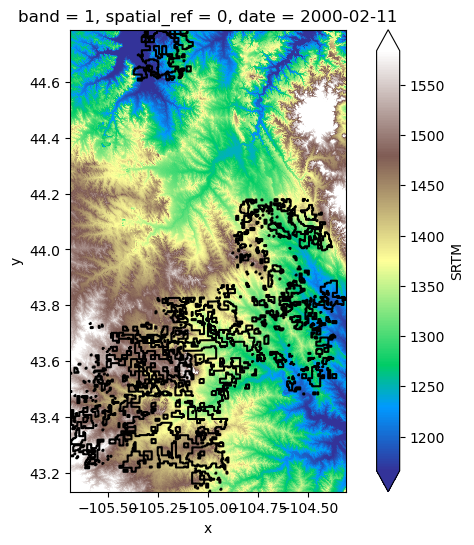

In [25]:
# Plotting srtm data with boundary
fig, ax = plt.subplots(figsize=(8,6))
srtm_da_list[0].plot(cmap=plt.cm.terrain,robust=True,ax=ax)
Thunder_gdf_4326.boundary.plot(ax=ax,color='black')
plt.show()

In [26]:
# Downloading and opening climate data
maca_url = (
    "http://thredds.northwestknowledge.net:8080/thredds/ncss/agg_"
    "macav2metdata_pr_CCSM4_r6i1p1_historical_1950_2005_CONUS_monthly.nc"
    "?var=precipitation&disableLLSubset=on&disableProjSubset=on&horizStr"
    "ide=1&time_start=1950-01-15T00%3A00%3A00Z&time_end=2005-12-15T00%3A0"
    "0%3A00Z&timeStride=1&accept=netcdf"
)

maca_response = requests.get(maca_url)

# Psuedocode: ideally would save this elsewhere but with time and debugging constraints this wasnt possible
with open('maca.nc', 'wb') as maca_file:
    maca_file.write(maca_response.content)

AttributeError: 'str' object has no attribute 'data_dir'

### Precipitation data across the United States
The diagram shows precipitation data for all states in the U.S along with a boundary for our study site. 

In [ ]:
# Changed elevatins longitude to be in range w other datasets 
maca_ds = xr.open_dataset('maca.nc')
maca_ds = maca_ds.assign_coords(lon=maca_ds.lon-360)
# Pulled out precip
precip_da = maca_ds.precipitation
precip_da.rio.write_crs("epsg:4326", inplace=True)
# Enabling clipping action to go through
precip_da.rio.set_spatial_dims('lon', 'lat', inplace=True)

precip_da.mean('time').hvplot(rasterize=True) * thunder_basin_gdf.hvplot()

In [ ]:
# Reprojecting precip raster to match sand & boundary
precip_da_reproj = precip_da.rename(lat='y', lon='x').rio.reproject_match(merged_sand_arrays)
precip_da_reproj

In [ ]:
# Displaying precipitation data array
precip_da_reproj

### Precipitation in the Thunder Basin National Grassland
This raster diagram shows precipitation levels for only our study site. 

In [ ]:
# Plotting and clipping preciptation data to be in boundary 
precip_da_clip = precip_da_reproj.rio.clip_box(*thunder_basin_gdf.total_bounds).mean('time').hvplot()
precip_da_clip

### Elevation plot
The plot displays the elevation data while highlighting the aspect of the terrain in the region.

In [1]:
#Calculate aspect from the srtm data 
aspect_da = xrspatial.aspect(srtm_opened_data)
aspect_da.hvplot(x='x', y='y', colormap="colorwheel")


NameError: name 'xrspatial' is not defined

### Optimal soil conditions
The diagram displays areas (yellow) where the soil type is ideal for Sorghastrum nutans.

In [ ]:
# Select sand values from array that exceed threshold; 1=possible indiangrass, 0=not possible
sand_optimal_indiangrass = ((merged_sand_raster >= 0) & (merged_sand_raster <= 50))
sand_optimal_indiangrass.plot()
print(sand_optimal_indiangrass.shape)

### Optimal climate conditions
The diagram displays areas (yellow) where the precipitation levels are ideal for Sorghastrum nutans.

In [ ]:
# Select precipitation (cm) values from array that exceed threshold; 1=possible indiangrass, 0=not possible
precip_optimal_indiangrass = ((precip_da_clip > 28) & (precip_da_clip < 114))
precip_optimal_indiangrass = precip_optimal_indiangrass.astype(int) 
precip_optimal_indiangrass.plot()
print(precip_optimal_indiangrass.shape)

### Optimal elevation 
The diagram displays areas (yellow) where the aspect is ideal for Sorghastrum nutans.

In [ ]:
# Select elevation (aspect-south facing) values from array that exceed threshold; 1=possible indiangrass, 0=not possible
aspect_optimal_indiangrass = ((aspect_da >= 157.5) & (aspect_da <= 202.5))
aspect_optimal_indiangrass.plot()
print(aspect_optimal_indiangrass.shape)

### Habitat Suitability Model for Sorghastrum nutans: 
The model below displays areas where Sorghastrum nutans can and probably does exist. These are areas that meet the soil, precipitation, and apsect criteria that are ideal for the species. All of which is within the Thunder Basin National Grassland boundary as that was the focus area for the project. 

In [ ]:
# Built HSM by multiplying rasters together
(aspect_optimal_indiangrass * precip_optimal_indiangrass * sand_optimal_indiangrass).hvplot(
    title = 'Habitat Suitability Model'
)